In [1]:
!pip install sentence_transformers
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=a7f68a95353ec3632cce0104dad680856323b9bc45a784a1b22b8d279a7a5eb6
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [2]:
def acp_dim_red(mat, p):

    pca = PCA(n_components=p)
    red_mat = pca.fit_transform(mat)
    return red_mat



In [5]:
# Define the Clustering function
def kmeans(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    kmeans = KMeans(k)
    cluster_labels = kmeans.fit_predict(mat)
    return cluster_labels

In [8]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_acp_emb = acp_dim_red(embeddings, 20)

# perform clustering
pred_acp_kmeans = kmeans(red_acp_emb, k)

# evaluate clustering results
nmi_score_acp = normalized_mutual_info_score(pred_acp_kmeans,labels)
ari_score_acp = adjusted_rand_score(pred_acp_kmeans,labels)

print(f'NMI: {nmi_score_acp:.2f} \nARI: {ari_score_acp:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.42 
ARI: 0.25


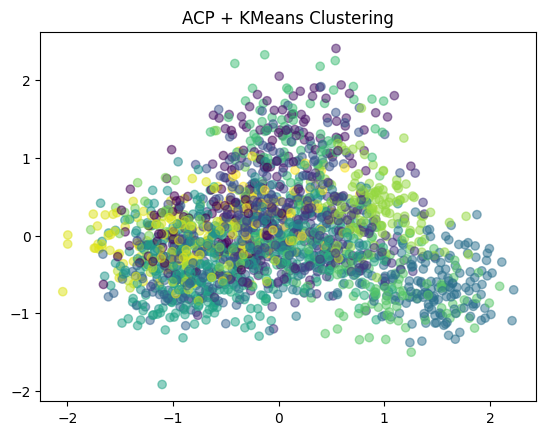

In [10]:
# Visualize the clusters
plt.scatter(red_acp_emb[:, 0], red_acp_emb[:, 1], c=pred_acp_kmeans, cmap='viridis', alpha=0.5)
plt.title('ACP + KMeans Clustering')
plt.show()